<a href="https://colab.research.google.com/github/Crackshaq/DTRF/blob/main/DTRF_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Decision Tree Accuracy: 0.9853658536585366
Random Forest Accuracy: 0.9853658536585366


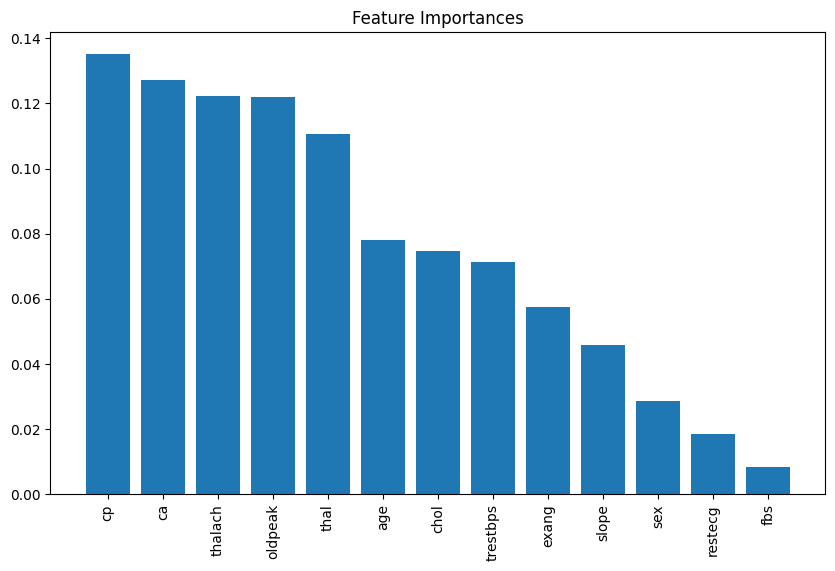

Cross-validation Accuracy: 0.9970731707317073


In [3]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.info()
df.isnull().sum()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True)
graphviz.Source(dot_data)


dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())
